<a href="https://colab.research.google.com/github/orinizri/ML_AI_colab_notebooks/blob/main/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip3 install torch

In [ ]:
import torch
import matplotlib.pyplot as plt

tensor([ 0.0000,  0.1010,  0.2020,  0.3030,  0.4040,  0.5051,  0.6061,  0.7071,
         0.8081,  0.9091,  1.0101,  1.1111,  1.2121,  1.3131,  1.4141,  1.5152,
         1.6162,  1.7172,  1.8182,  1.9192,  2.0202,  2.1212,  2.2222,  2.3232,
         2.4242,  2.5253,  2.6263,  2.7273,  2.8283,  2.9293,  3.0303,  3.1313,
         3.2323,  3.3333,  3.4343,  3.5354,  3.6364,  3.7374,  3.8384,  3.9394,
         4.0404,  4.1414,  4.2424,  4.3434,  4.4444,  4.5455,  4.6465,  4.7475,
         4.8485,  4.9495,  5.0505,  5.1515,  5.2525,  5.3535,  5.4545,  5.5556,
         5.6566,  5.7576,  5.8586,  5.9596,  6.0606,  6.1616,  6.2626,  6.3636,
         6.4646,  6.5657,  6.6667,  6.7677,  6.8687,  6.9697,  7.0707,  7.1717,
         7.2727,  7.3737,  7.4747,  7.5758,  7.6768,  7.7778,  7.8788,  7.9798,
         8.0808,  8.1818,  8.2828,  8.3838,  8.4848,  8.5859,  8.6869,  8.7879,
         8.8889,  8.9899,  9.0909,  9.1919,  9.2929,  9.3939,  9.4949,  9.5960,
         9.6970,  9.7980,  9.8990, 10.00

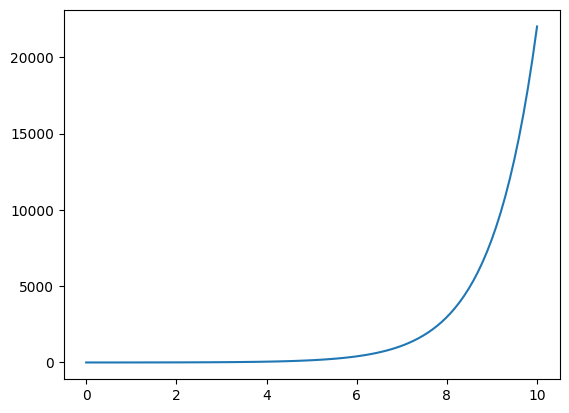

In [ ]:
a = torch.tensor([1,2,3])
# print(a)

x = torch.linspace(0, 10, 100)
y = torch.exp(x)
print(x)
print(y)
plt.plot(x.numpy(), y.numpy())


In [ ]:
one_d = torch.arange(0,9)
two_d = one_d.view(3,3)
two_d

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
two_d.dim()

2

In [ ]:
torch.arange(18).view(3,2,3)
# view - number of blocks, number of rows and number of columns

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [ ]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def forward(x):
  return w * x + b

# x = torch.tensor(2)
# print(forward(x))
# x = torch.tensor([[2], [3]])
# print(forward(x))

In [ ]:
from torch.nn import Linear

torch.manual_seed(1)

model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

x = torch.tensor([2.0])
model(x)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


tensor([0.5891], grad_fn=<ViewBackward0>)

In [ ]:
import torch.nn as nn
import numpy as np

torch.manual_seed(1)

class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size) -> None:
    super().__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)

  def forward(self, x):
    return self.linear(x)

  def get_parameters(self):
    [w,b] = self.parameters()
    w1 = w[0][0]
    b1 = b[0]
    return w1.item(), b1.item()

  def fit_plot(self, title, x_start, x_end):
    plt.title = title
    w1, b1 = self.get_parameters()
    x1 = np.array([x_start, x_end])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()


model = LinearRegression(1,1)
# model.forward(torch.tensor([1.0]))
# print(model.get_parameters())
# print(model.fit_plot('Initial Model', -25, 25))

Text(0, 0.5, 'y')

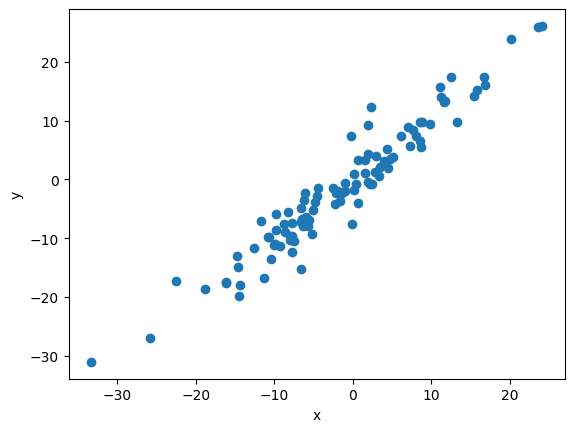

In [ ]:
import matplotlib.pyplot as plt
# noisy dataset
X = torch.randn(100,1) * 10
y = X + 3 * torch.randn(100,1)

plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# criterion that measures the mean squared error between each element in the input x and target y.
criterion = nn.MSELoss()
# stochastic gradient descent, lr means learning rate
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  # print("epoch:", i, "loss:", loss)
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

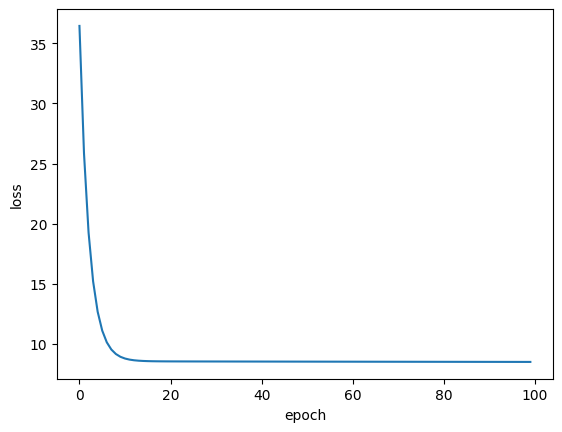

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from sklearn import datasets

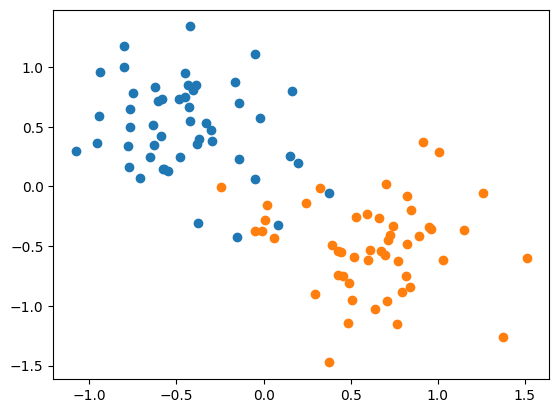

In [ ]:
# Create a dataset with two clusters
n = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n, n_features=2, centers=centers, random_state=1, cluster_std=0.4)
x_data= torch.Tensor(X)
y_data= torch.Tensor(y).reshape(100,1)

# Show scatter plot
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

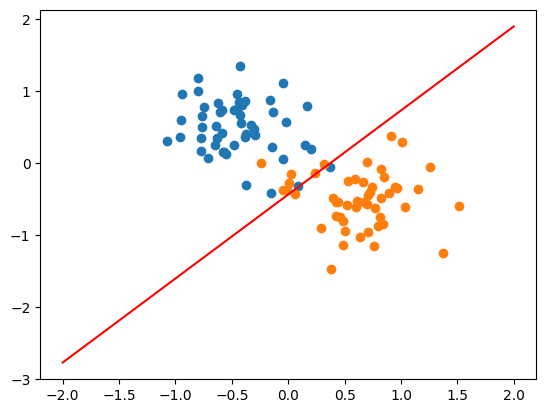

In [ ]:
torch.manual_seed(1)

class Model(nn.Module):
  def __init__(self, input_size, output_size) -> None:
    super().__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)

  def forward(self, x):
    return torch.sigmoid(self.linear(x))

  def get_params(self):
    [w, b] = model.parameters()
    w1, w2 = w.view(2)
    b1 = b[0]
    return w1.item(), w2.item(), b1.item()

  def fit_plot(self, title, x_start, x_end):
    plt.title = title
    w1, w2, b1 = self.get_params()
    x1 = np.array([x_start, x_end])
    x2 = (w1 * x1 + b1) / - w2
    plt.plot(x1, x2, 'r')
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    plt.show()

  def predict(self, x):
    pred = self.forward(x)
    return round(pred.item())


model = Model(2, 1)
model.fit_plot('Initial Model', -2.0, 2)

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(lr=0.001, params=model.parameters())
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  optimizer.zero_grad()
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

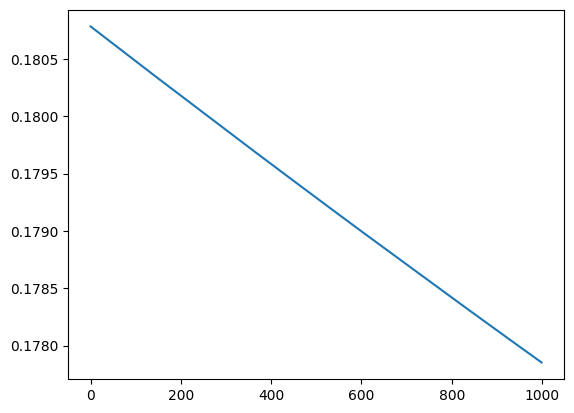

In [ ]:
plt.plot(range(epochs), losses)

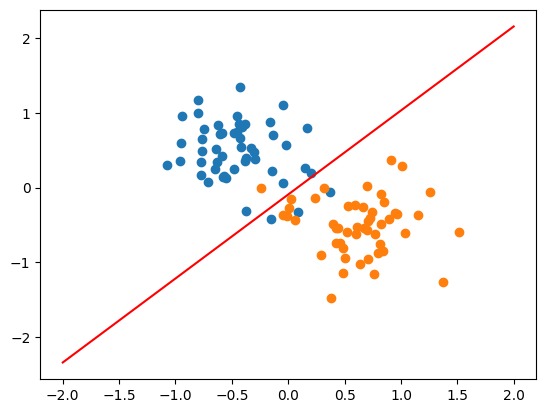

In [ ]:
model.fit_plot('Trained Model', -2.0, 2.0)

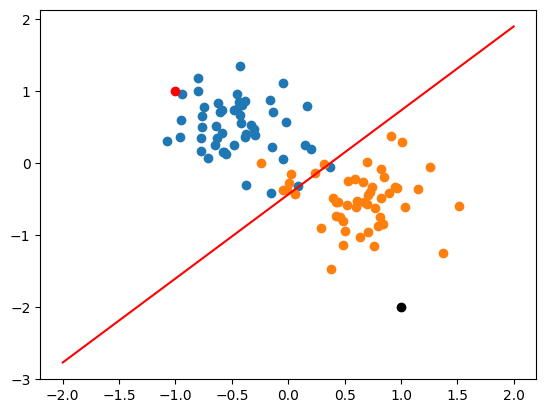

In [ ]:
point1 = torch.Tensor([-1.0, 1.0])
point2 = torch.Tensor([1.0, -2.0])
model.predict(point1)
model.predict(point2)
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
model.fit_plot('Trained Model', -2.0, 2.0)

In [ ]:
from sklearn import datasets

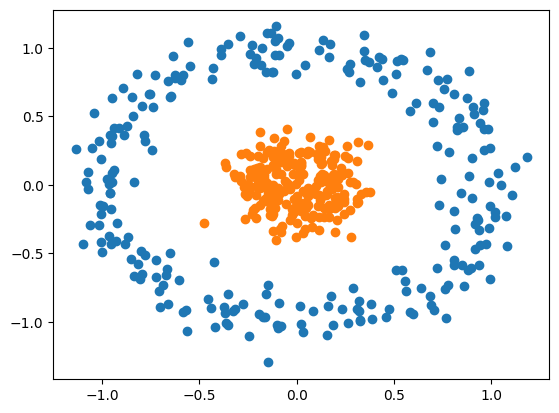

In [ ]:
# Create a dataset with two clusters
n = 500
X, y = datasets.make_circles(n_samples=n, noise=0.1, random_state=1, factor=0.2)
x_data= torch.Tensor(X)
y_data= torch.Tensor(y).reshape(500,1)

# Show scatter plot
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [ ]:
import torch.nn as nn
import numpy as np

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size) -> None:
    super().__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=H1)
    self.linear2 = nn.Linear(in_features=H1, out_features=output_size)

  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x

In [ ]:
model = Model(2, 4, 1)
list(model.parameters())

[Parameter containing:
 tensor([[-0.5927, -0.1428],
         [-0.1858,  0.5944],
         [ 0.3566,  0.3241],
         [-0.0307, -0.4797]], requires_grad=True),
 Parameter containing:
 tensor([-0.3694, -0.2920,  0.4317,  0.2749], requires_grad=True),
 Parameter containing:
 tensor([[ 0.4144, -0.3973, -0.2740,  0.1619]], requires_grad=True),
 Parameter containing:
 tensor([-0.4692], requires_grad=True)]

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  optimizer.zero_grad()
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

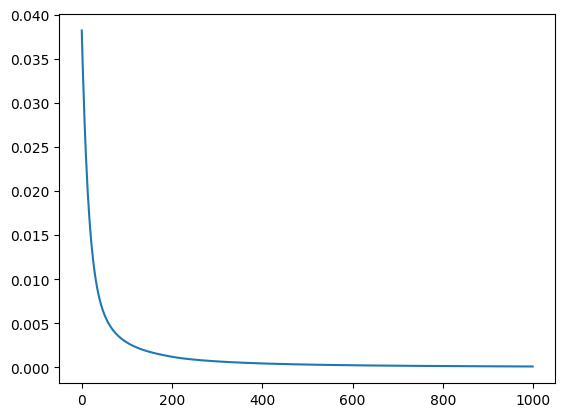

In [ ]:
plt.plot(range(epochs), losses)

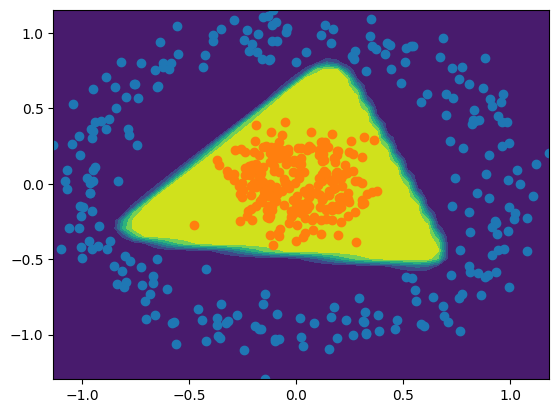

In [ ]:
def plot_decision_boundary(X,y):
  # Define the range of the plot grid
  x_span = np.linspace(min(X[:, 0]), max(X[:, 0]))
  y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))
  # Create a grid of points (xx, yy)
  xx, yy = np.meshgrid(x_span, y_span)
  # Prepare the grid for the model
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  # Use the model to predict the grid
  pred_func = model.forward(grid)
  # Reshape the predictions
  z = pred_func.view(xx.shape).detach().numpy()
  # Plot the decision boundary
  plt.contourf(xx, yy, z)


plot_decision_boundary(X,y)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])